# Homework 07 - Trees

**Instructions:** Complete the exercises below.

1. Make a copy of this Colab Notebook using **`File -> Save a copy in Drive`**.

2. Answer the exercise questions below. Type your answers to each question by double-clicking on **`Your Answer`** and typing your response.

    Note that you can use any combination of plain text, Markdown, or LaTeX. As a last resort, you can simply take a picture of your handwritten work and upload it to an answer cell below.

3. To submit your work, turn in the URL for your Colab notebook by clicking "Share" then "Copy Link".

**Note**:
Sample solutions are provided in order to help you **learn**. The purpose of these exercises is not to simply turn in the answers, but to take the time and effort to learn and understand the material. You are encouraged to work the problems first, then when you are satisfied that you have the correct answer, look at the sample solution and compare it with yours.

As you complete the problems below, you may use Python whenever you can think of a way it could help you answer the question.

### Notes about drawing

Some of the problems will require you to draw a graph or tree. You may

1. (Preferred) Use a Python tool such as `Graphviz`. See the source code of the graphs shown in the questions for examples of how to use `Graphviz`.

    For addition help with `Graphviz`, see [A Quick Introduction to Graphviz](https://www.worthe-it.co.za/blog/2017-09-19-quick-introduction-to-graphviz.html) and the [Graphviz Documentation](https://graphviz.org/documentation/), especially the [Attributes](https://graphviz.org/doc/info/attrs.html) page.

    or
    
2. Draw them by hand and take a picture. To easily include a picture in Colab, open a **text** cell and use the "Insert Image" button or copy/paste a picture into the cell. Colab will automatically convert it to Base-64 encoding. Type "ESC" to close the cell and you'll see the picture.


### Exercise 7.1

How many different (non-isomorphic) unrooted trees are there with 6 vertices? Draw them to figure it out. (You may draw them by hand or use Python).

#### Hint

Here's an example of how to draw a tree using `graphviz`. Note the use of "layout=dot" instead of "layout=neato". This results in a better visual representation of the tree.

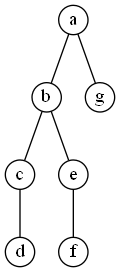

In [ ]:
my_tree = '''
graph tree {
  layout=dot; # use dot instead of neato for trees
  node [shape=circle; fixedsize=true; width=0.30]; # specifies the node size/shape
  a--b;
  a--g;
  b--c;
  b--e;
  c--d;
  e--f;
}'''
from graphviz import Source
from IPython.display import Image, display
display(Image(Source(my_tree, format='png').render()))

#### Your Answer:

There are 6 total trees

### Exercise 7.2

A convenient way to visualize an algebraic expression is by its expression tree. Consider the expression

$X = a*b-c/d+e$

Since we normally put a precedence on multiplication/divisions, $X$ is evaluated as $((a*b) - (c/d) + e)$. Consecutive multiplication/divisions or addition/subtractions are evaluated from left to right.

We can break $X$ down into the sum of two simpler expressions $(a*b) - (c/d)$ and $e$.

The first of these expressions can be broken down further into the difference of the expressions $a*b$ and $c/d$.

If we decompose an expression into $\texttt{(left expression) operation (right expression)}$, we can represent the expression as a binary tree whose root contains the operation and whose left and right subtrees are the trees of the left and right expressions, respectively. A simple variable or a number has an expression tree that is a single vertex containing the variable or number.

The evolution of the expression tree for expression $X$ is:

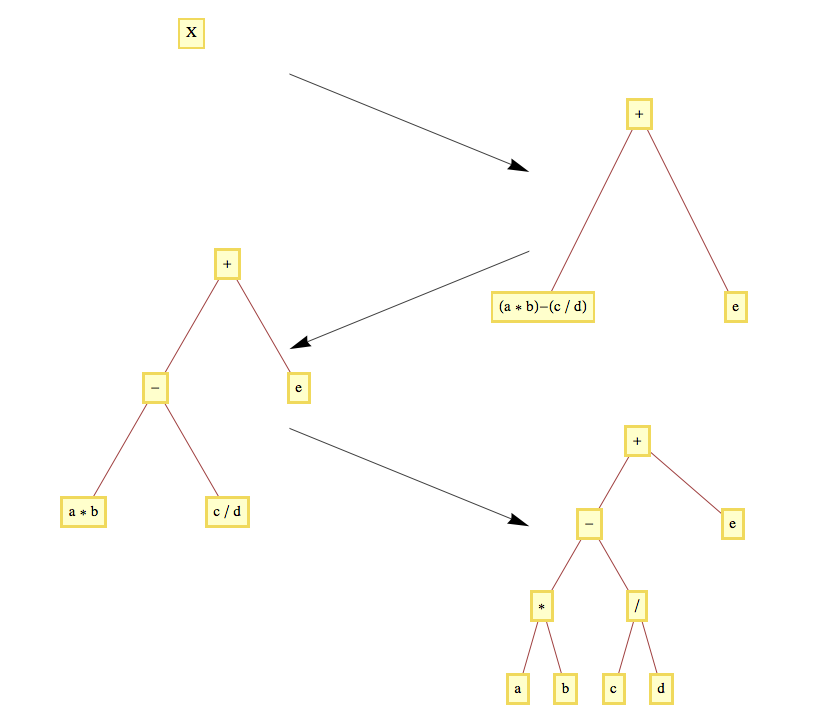

Draw the expression trees for the following expressions. You may draw them by hand and upload a picture or draw them using Python or ASCII art. If using `graphviz` use `"*"` and `"* "` to display labels on vertices and distinguish them.

1. $a(b+c)$

2. $ab + c$

3. $ab + ac$

4. $bb-4ac$

5. $a^2 + b^2$

Question adapted from [Applied Discrete Structures](https://discretemath.org/) by Alan Doerr & Kenneth Levasseur which is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-nc-sa/3.0/us/).

#### Your Answer:

In [ ]:
tree1 = '''
graph tree {
    layout=dot
    node [shape=circle]
    "*"--a;
    "*"--"+";
    "+"--b;
    "+"--c;

}'''
from graphviz import Source
from IPython.display import Image, display
display(Image(Source(tree1, format='png').render()))

In [ ]:
tree2 = '''
graph tree {
    layout=dot
    node [shape=circle]
    "+"--"*";
    "*"--a;
    "*"--b;
    "+"--c;

}'''
display(Image(Source(tree2, format='png').render()))

In [ ]:
tree3 = '''
graph tree {
    layout=dot
    node [shape=circle]
    "+"--"* ";
    "+"--"*";
    "* "--a;
    "* "--b;
    "*"--"a ";
    "*"--c;

}'''
display(Image(Source(tree3, format='png').render()))

In [ ]:
tree4 = '''
graph tree {
  layout=dot
  node [shape=circle]
  "-"--"*";
  "-"--"* ";
  "*"--"b";
  "*"--"b ";
  "* "--" *";
  "* "--c;
  " *"--4;
  " *"--a;
}'''

display(Image(Source(tree4, format='png').render()))

In [ ]:
tree5 = '''
graph tree {
  layout=dot
  node [shape=circle]
  "+"--"*";
  "*"--a;
  "*"--"a ";
  "+"--"* ";
  "* "--b;
  "* "--"b ";
}'''

display(Image(Source(tree5, format='png').render()))

### Exercise 7.3


One way to represent a tree is by using nested lists. For example, this tree:

`['a', ['b', ['c', 'd', 'e'], 'f'], ['g', 'h', 'i']]`

would be drawn as:

```
        a
      /   \
    b       g
   / \     / \
  c   f   h   i
 / \
d   e
```

Draw the expression tree representing the following expression, then evaluate it by hand.

`['-', ['*', 13, ['+', ['/', 32, -4], 12]], ['*', ['+', ['-', 10, 1], 3], 4]]`

#### Your Answer:

4 is the answer

### Exercise 7.4


Write a Python function to evaluate the following expression tree. Make sure you get the same answer as in the previous exercise.

Hint: The Python `isinstance` function may help you

In [ ]:
et = ['-', ['*', 13, ['+', ['/', 32, -4], 12]], ['*', ['+', ['-', 10, 1], 3], 4]]

#### Your Answer:

In [1]:
tree = ['-',['*',13,['+',['/',32,-4],12]],['*',['+',['-',10,1],3],4]]

def evaluate_tree(t):
    if isinstance(t, int):
        return t
    elif t[0]=="-":
        return evaluate_tree(t[1]) - evaluate_tree(t[2])
    elif t[0] == "+":
        return evaluate_tree(t[1]) + evaluate_tree(t[2])
    elif t[0] == "*":
        return evaluate_tree(t[1]) * evaluate_tree(t[2])
    elif t[0] == "/":
        return evaluate_tree(t[1]) // evaluate_tree(t[2])

evaluate_tree(tree)

4

### Exercise 7.5

Use the following tree for prefix codes.

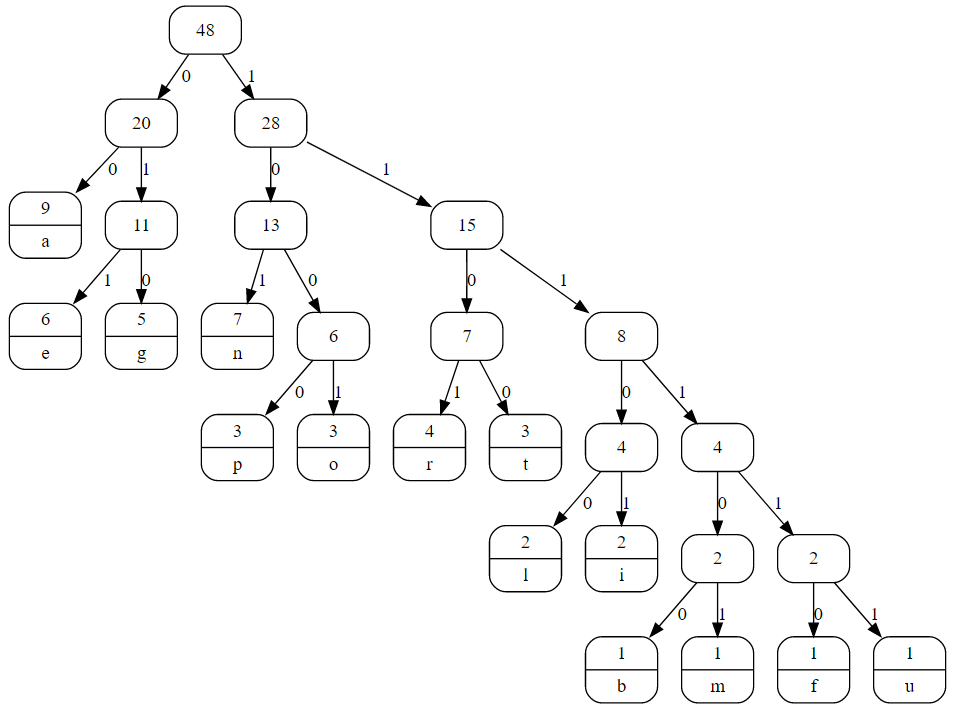

1. Use the tree to encode "apple"
2. Use the tree to encode "grapefruit"
3. Use the tree to decode "111100001010010100"
4. Use the tree to decode "1001110100101010011"


#### Your Answer:
1. 001000100011100011
2. 01011010010000111111101101111111111011100
3. banana
4. orange

### Exercise 7.6


Using the below table of prefix codes, store them in a Python dictionary, then use Python to encode this message:

"discrete math is fun"

As a challenge, try to use `map` to complete this exercise.

|Letter|Code|
|---|---|
|space|110|
|a|0111|
|b|1011100|
|c|10110|
|d|0000|
|e|1111|
|f|1011101|
|g|0110110|
|h|01101011|
|i|001|
|j|011010100|
|k|011010101|
|l|0001|
|m|11100|
|n|0101|
|o|1000|
|p|01100|
|q|1011111|
|r|0100|
|s|11101|
|t|1010|
|u|1001|
|v|0110111|
|w|011010010|
|x|1011110|
|y|011010011|
|z|01101000|

#### Your Answer:

In [2]:
values = {'d': '0000', 'l': '0001', 'i': '001', 'r': '0100', 'n': '0101', 'p': '01100', 'z': '01101000', 'w': '011010010', 'y': '011010011', 'j': '011010100', 'k': '011010101', 'h': '01101011', 'g': '0110110',
     'v': '0110111', 'a': '0111', 'o': '1000', 'u': '1001', 't': '1010', 'c': '10110', 'b': '1011100', 'f': '1011101', 'x': '1011110', 'q': '1011111', ' ': '110', 'm': '11100', 's': '11101', 'e': '1111'}

mes = 'discrete math is fun'

def encode(mes):
    return ''.join(map(lambda x: values[x], mes))

print(encode(mes))

00000011110110110010011111010111111011100011110100110101111000111101110101110110010101


### Exercise 7.7


Using the same table as the previous exercise, use Python to decode this message:

0110001001111101110100110111101101011010000000111111101110011101001111110101110110010101

Hint: Try creating a reversed dictionary in which the keys are the prefix codes and the values are the letters.

#### Your Answer:

In [3]:
d = {'d': '0000', 'l': '0001', 'i': '001', 'r': '0100', 'n': '0101', 'p': '01100', 'z': '01101000', 'w': '011010010', 'y': '011010011', 'j': '011010100', 'k': '011010101', 'h': '01101011', 'g': '0110110',
     'v': '0110111', 'a': '0111', 'o': '1000', 'u': '1001', 't': '1010', 'c': '10110', 'b': '1011100', 'f': '1011101', 'x': '1011110', 'q': '1011111', ' ': '110', 'm': '11100', 's': '11101', 'e': '1111'}

rev_d = dict([(value, key) for key, value in d.items()])
encoded_message = '0110001001111101110100110111101101011010000000111111101110011101001111110101110110010101'

def decode(string):
    result = ''
    bits = ''
    while len(string) > 0:
        bits += string[:1]
        string = string[1:]
        if rev_d.get(bits):
            result += rev_d.get(bits)
            bits = ''
    return result

print()
print(f'Decoded message: {decode(encoded_message)}')


Decoded message: prefix codes are fun


### Exercise 7.8


1. Assuming a text file uses 8 bits to store each letter, how many bits will it take to store the word "mississippi"?

2. If we know that only the letters m, i, s, and p will be used in a text file, we can use the following tree for a prefix code. How many bits will it take to encode the word "mississippi" using this prefix code?

3. What is the average number of bits per letter using this prefix code?

4. What is the compression ratio for using this prefix code versus using a fixed encoding of 8 bits per letter?

   (Hint: Compression ratio is calculated using the formula $\frac{f-v}{f}*100$ where $f$ is the number of bits for fixed encoding and $v$ is the number of bits for variable length encoding.)

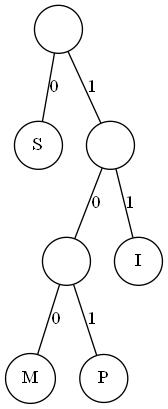

In [ ]:
#@title Code used to draw this tree {display-mode: "form"}
dot = '''
graph tree {
    layout=dot;
    node [shape=circle];
    S;
    0, 1, 2 [label=""];
    0--S [label=0];
    0--1 [label=1];
    1--2 [label=0];
    1--I [label=1];
    2--M [label=0];
    2--P [label=1];
  }
'''
from graphviz import Source
from IPython.display import Image, display
display(Image(Source(dot, format='png').render()))

#### Your Answer:

In [4]:
word = "mississippi"

print(f'1. {8*len(word)}')

total = 1*word.count('s') + 2*word.count('i') + 3*word.count('m') + 3*word.count('p')
print(f'2. {total}')

print(f'3. {total/len(word)} bits per letter')

f = 8
v = total/len(word)
print(f'4. {100*(f-v)/f:.2f}%')

1. 88
2. 21
3. 1.9090909090909092 bits per letter
4. 76.14%


### Exercise 7.9

Give the order in which the vertices of the following tree are visited in

1. Pre-order traversal
2. Post-order traversal


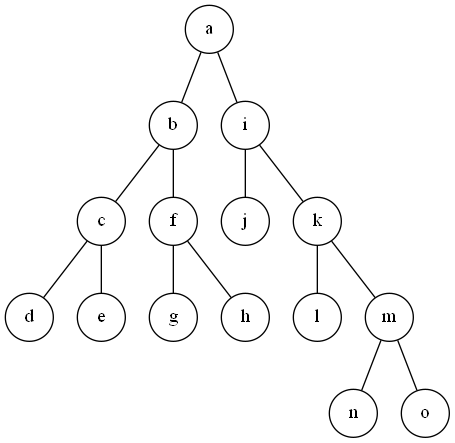

In [ ]:
#@title Source Code to Draw the Tree {display-mode: "form"}
my_tree = '''
graph tree {
  layout=dot
  node [shape=circle]
  a--b--c--d;
  c--e;
  b--f--g;
  f--h;
  a--i--j;
  i--k--l;
  k--m--n;
  m--o;
}'''
from graphviz import Source
from IPython.display import Image, display
display(Image(Source(my_tree, format='png').render()))

#### Your Answer:
1. Pre-order: a b c d e f g h i j k l m n o
2. Post-order: d e c g h f b j l n o m k i a

### Exercise 7.10

The tree from the previous exercise is represented here using nested lists. This binary tree is represented as a list in which the first element is the root node, the second element is the left sub-tree, and the third element is the right sub-tree.

`tree = ['a', ['b', ['c', ['d'], ['e']], ['f', ['g'], ['h']]], ['i', ['j'], ['k', ['l'], ['m', ['n'], ['o']]]]]`

Create a Python function called `preorder` that will take this tree as an input and print each node's label. The result should be a list of the nodes using pre-order traversal. Use the pseudocode from Figure 14.4.2 and reproduced here to help you.

```
      Pre-order(v)

      process(v)
      For every child w of v:
            Pre-order(w)
      End-for
```

#### Your Answer:

In [6]:
tree = ['a', ['b', ['c', ['d'], ['e']], ['f', ['g'], ['h']]], ['i', ['j'], ['k', ['l'], ['m', ['n'], ['o']]]]]

def preorder(T):
    process(T[0])
    for child in T[1:]:
        preorder(child)

preorder(tree) # should result in: a b c d e f g h i j k l m n o

a b c d e f g h i j k l m n o 

### Exercise 7.11


Using the same tree from the previous exercise, create a Python function called `postorder` that will take this tree as an input and print each node's label. The result should be a list of the nodes using post-order traversal. Use the pseudocode from Figure 14.4.3 and reproduced here to help you.

```
      Post-order(v)

      For every child w of v:
            Post-order(w)
      End-for
      process(v)
```

#### Your Answer:

In [ ]:
tree = ['a', ['b', ['c', ['d'], ['e']], ['f', ['g'], ['h']]], ['i', ['j'], ['k', ['l'], ['m', ['n'], ['o']]]]]

def postorder(T):
    # your code here
    pass


# Call the preorder function with the tree
postorder(tree) # should result in: d e c g h f b j l n o m k i a

### Exercise 7.12


Give the vertex order and draw the resulting tree from doing a Depth-first search on the following graph. Start at vertex `a`. Use alphabetical order to break any ties.

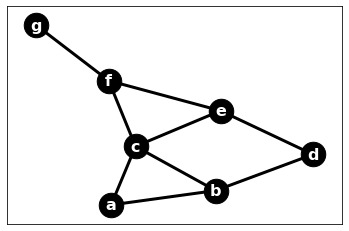

#### Your Answer:

### Exercise 7.13

Give the vertex order and draw the resulting tree from doing a Breadth-first search on the following graph. Start at vertex `a`. Use alphabetical order to break any ties.

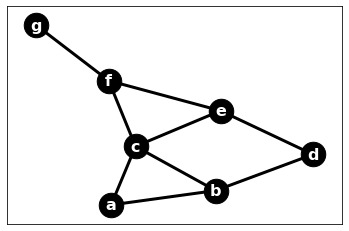

#### Your Answer:

### Exercise 7.14


Use Prim's Algorithm to find a minimal spanning tree for the following graphs. Start at vertex `a` and use alphabetical order to break any ties.

1. List the edges in the order in which they are added to the tree.
2. Give the weight of the minimal spanning tree.

You do not need to draw them.

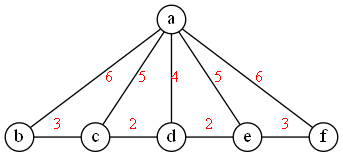

In [ ]:
#@title Graph 1: {display-mode: "form"}
dot = '''
graph {
    layout=dot;
    ranksep=.75;
    size=6;
    edge [fontsize=12, fontcolor=red];
    node [shape=circle, margin=0, width=0.25];
    a;
    subgraph {
        b;c;d;e;f;
        rank=same;
    }
    a--b [label=6];
    a--c [label=5];
    a--d [label=4];
    a--e [label=5];
    a--f [label=6];
    b--c [label=3];
    c--d [label=2];
    d--e [label=2];
    e--f [label=3];
  }
 '''
from graphviz import Source
from IPython.display import Image, display
display(Image(Source(dot, format='png').render()))

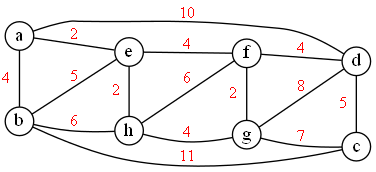

In [ ]:
#@title Graph 2: {display-mode: "form"}
dot = '''
graph {
    layout=dot;
    rankdir=LR;
    ranksep=.75;
    size=6;
    edge [fontsize=12, fontcolor=red];
    node [shape=circle, margin=0, width=0.25];
    subgraph {
        a;b;
        rank=same;
    }
    subgraph {
        e;h;
        rank=same;
    }
    subgraph {
        f;g;
        rank=same;
    }

    subgraph {
        c;d;
        rank=same;
    }

    a--b [label=4];
    a--d [label=10];
    a--e [label=2];
    b--c [label=11];
    d--c [label=5];
    e--f [label=4];
    f--g [label=2];
    g--h [label=4];
    e--h [label=2];
    h--f [label=6];
    e--b [label=5];
    h--b [label=6];
    g--c [label=7];
    g--d [label=8];
    f--d [label=4];
  }
 '''
from graphviz import Source
from IPython.display import Image, display
display(Image(Source(dot, format='png').render()))

#### Your Answer:

----------------------
## Sample Solutions

**Note**:
Sample solutions are provided in order to help you **learn**. The purpose of these exercises is not to simply turn in the answers, but to take the time and effort to learn and understand the material. You are encouraged to work the problems first, then when you are satisfied that you have the correct answer, look at the sample solution and compare it with yours.

### Sample Solution 7.1

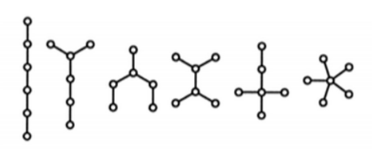

### Sample Solution 7.2

In [ ]:
tree1 = '''
graph tree {
    layout=dot
    node [shape=circle]
    "*"--a;
    "*"--"+";
    "+"--b;
    "+"--c;

}'''
from graphviz import Source
from IPython.display import Image, display
display(Image(Source(tree1, format='png').render()))

In [ ]:
tree2 = '''
graph tree {
    layout=dot
    node [shape=circle]
    "+"--"*";
    "*"--a;
    "*"--b;
    "+"--c;

}'''
display(Image(Source(tree2, format='png').render()))

In [ ]:
# ab + ac
tree3 = '''
graph tree {
    layout=dot
    node [shape=circle]
    "+"--"* ";
    "+"--"*";
    "* "--a;
    "* "--b;
    "*"--"a ";
    "*"--c;

}'''
display(Image(Source(tree3, format='png').render()))

In [ ]:
# bb-4ac

tree4 = '''
graph tree {
  layout=dot
  node [shape=circle]
  "-"--"*";
  "-"--"* ";
  "*"--"b";
  "*"--"b ";
  "* "--" *";
  "* "--c;
  " *"--4;
  " *"--a;
}'''

display(Image(Source(tree4, format='png').render()))


In [ ]:
# 5. $a^2 + b^2$
tree5 = '''
graph tree {
  layout=dot
  node [shape=circle]
  "+"--"*";
  "*"--a;
  "*"--"a ";
  "+"--"* ";
  "* "--b;
  "* "--"b ";
}'''

display(Image(Source(tree5, format='png').render()))

### Sample Solution 7.3

The answer is 4. This is the tree:

In [ ]:
dot = '''
graph tree {
  layout=dot
  node [shape=circle]
  "-"--"*";
  "*"--13;
  "*"--"+";
  "+"--"/";
  "+"--12;
  "/"--32;
  "/"--"-4";
  "-"--"* ";
  "* "--"+ ";
  "* "--4;
  "+ "--"- ";
  "+ "--3;
  "- "--10;
  "- "--1;
}'''

display(Image(Source(dot, format='png').render()))

### Sample Solution 7.4

In [ ]:
et = ['-',['*',13,['+',['/',32,-4],12]],['*',['+',['-',10,1],3],4]]

def evaluate_tree(t):
    if isinstance(t, int): # Must be a leaf node
        return t
    elif t[0]=="-":
        return evaluate_tree(t[1]) - evaluate_tree(t[2])
    elif t[0] == "+":
        return evaluate_tree(t[1]) + evaluate_tree(t[2])
    elif t[0] == "*":
        return evaluate_tree(t[1]) * evaluate_tree(t[2])
    elif t[0] == "/":
        return evaluate_tree(t[1]) // evaluate_tree(t[2])
    else: # we have a problem
        raise(ValueError)

evaluate_tree(et)

In [ ]:
# Alternative solution, making use of the Python eval() function

def evaluate_tree(t):
  if isinstance(t, int):
    return t

  return eval(f'{evaluate_tree(t[1])} {t[0]} {evaluate_tree(t[2])}')

evaluate_tree(et)


In [ ]:
# Alternative solution provided by Michael Hendrick, Spring 2023
op_map = {
    "+": (lambda x, y: x + y),
    "-": (lambda x, y: x - y),
    "*": (lambda x, y: x * y),
    "/": (lambda x, y: x / y),
}

def evaluate(ls):
  operator = ls[0]
  a = evaluate(ls[1]) if isinstance(ls[1], list) else ls[1]
  b = evaluate(ls[2]) if isinstance(ls[2], list) else ls[2]

  return op_map[operator](a, b)

evaluate(et)


### Sample Solution 7.5

1. 001000100011100011
2. 01011010010000111111101101111111111011100
3. banana
4. orange

### Sample Solution 7.6

In [ ]:
# create a dictionary to store the encodings
d = {'d': '0000', 'l': '0001', 'i': '001', 'r': '0100', 'n': '0101', 'p': '01100', 'z': '01101000', 'w': '011010010', 'y': '011010011', 'j': '011010100', 'k': '011010101', 'h': '01101011', 'g': '0110110',
     'v': '0110111', 'a': '0111', 'o': '1000', 'u': '1001', 't': '1010', 'c': '10110', 'b': '1011100', 'f': '1011101', 'x': '1011110', 'q': '1011111', ' ': '110', 'm': '11100', 's': '11101', 'e': '1111'}

message = 'discrete math is fun'

# using map
def encode(message):
    return ''.join(map(lambda x: d[x], message))

print(encode(message))

# another way using a conventional function
def encode(message):
    result = ''
    for letter in message:
        result += d[letter]
    return result

print(encode(message))

### Sample Solution 7.7

In [ ]:
# create a dictionary to store the encodings
d = {'d': '0000', 'l': '0001', 'i': '001', 'r': '0100', 'n': '0101', 'p': '01100', 'z': '01101000', 'w': '011010010', 'y': '011010011', 'j': '011010100', 'k': '011010101', 'h': '01101011', 'g': '0110110',
     'v': '0110111', 'a': '0111', 'o': '1000', 'u': '1001', 't': '1010', 'c': '10110', 'b': '1011100', 'f': '1011101', 'x': '1011110', 'q': '1011111', ' ': '110', 'm': '11100', 's': '11101', 'e': '1111'}

# swap key,value in the dictionary to make lookups faster.
rev_d = dict([(value, key) for key, value in d.items()])
print(rev_d) # print it to see what it looks like

encoded_message = '0110001001111101110100110111101101011010000000111111101110011101001111110101110110010101'

def decode(string):
    result = ''
    bits = ''
    while len(string) > 0:
        bits += string[:1]
        string = string[1:]
        if rev_d.get(bits):
            result += rev_d.get(bits)
            bits = ''
    return result

print()
print(f'Decoded message: {decode(encoded_message)}')


### Sample Solution 7.8

In [ ]:
word = "mississippi"
# 1
print(f'1. {8*len(word)}')

# 2
total = 1*word.count('s') + 2*word.count('i') + 3*word.count('m') + 3*word.count('p')
print(f'2. {total}')

# 3
print(f'3. {total/len(word)} bits per letter')

# 4
f = 8  # 8 bits per letter for fixed encoding
v = total/len(word)  # this many bits per letter for variable length encoding using the given prefix code
print(f'4. {100*(f-v)/f:.2f}%')

### Sample Solution 7.9

1. Pre-order: a b c d e f g h i j k l m n o
2. Post-order: d e c g h f b j l n o m k i a

### Sample Solution 7.10

In [ ]:
tree = ['a', ['b', ['c', ['d'], ['e']], ['f', ['g'], ['h']]], ['i', ['j'], ['k', ['l'], ['m', ['n'], ['o']]]]]

# Print a single node
def process(v):
    print(v, end=" ")

def preorder(T):
    process(T[0])
    for child in T[1:]:
        preorder(child)

preorder(tree) # should result in: a b c d e f g h i j k l m n o

### Sample Solution 7.11

In [ ]:
tree = ['a', ['b', ['c', ['d'], ['e']], ['f', ['g'], ['h']]], ['i', ['j'], ['k', ['l'], ['m', ['n'], ['o']]]]]

# Print a single node
def process(v):
    print(v, end=" ")

def postorder(T):
    for child in T[1:]:
        postorder(child)
    process(T[0])

postorder(tree)

### Sample Solution 7.12

Order: a, b, c, e, d, f, g

In [ ]:
my_tree = '''
graph tree {
  layout=dot
  node [shape=circle]
  a--b--c--e--d;
  e--f--g;
}'''
display(Image(Source(my_tree, format='png').render()))

### Sample Solution 7.13

Order: a, b, c, d, e, f, g

In [ ]:

my_tree = '''
graph tree {
  layout=dot
  node [shape=circle]
  a--{b, c};
  b--d;
  c--{e, f};
  f--g;
}'''
display(Image(Source(my_tree, format='png').render()))

### Sample Solution 7.14

Graph 1: \
{a,d}, {c,d}, {d,e}, {b,c}, {e,f} \
Total weight: 14


Graph 2:\
{a,e}, {e,h}, {a,b}, {e,f}, {f,g}, {d,f}, {c,d}\
Total weight: 23